Roll no.: 215229145<br>
Name.: Yokeshwaran G

# Lab 1. Real time crawling of tweets from Twitter and creating a network of user mentions

### Step 1: Install and import tweepy library

In [1]:
import os
import tweepy as tw
import pandas as pd

### Step 2: Sign up your twitter developer account and obtain the following credentials (https://developer.twitter.com/en)¶

In [2]:
consumer_key= 'GuEy6CRFi4F0peJmNUQYxuk1C'
consumer_secret= '9xM4cPM1c2qoKbL4seKpUUioednhBmJMOlp4OsxYJuBMXzT08T'
access_token= '1551438660360622080-mgDW8nKmuLOOPbvOv5m5yRYcFIN3we'
access_token_secret= 'tLXXaZAk2rxj8TLz751M4vIYDZNzDVGW0DoDhS1IhxZsp'

### Step 3: Using the above credentials get yourself authorized to stream real time tweets using the code snippet below

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [4]:
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAPfTfAEAAAAAp4rugNXvCARjoXALTtN1%2BISo1BQ%3DrAqgcaifiSyI8M3bM97XFkK7GuQtK4g64RkXPll4apGxF4ngsI"

# create your client
client = tw.Client(bearer_token=MY_BEARER_TOKEN)

In [5]:
# query to search for tweets
query = "#varisu"


# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 10,
                                     expansions='author_id'
                                     )

In [6]:
tweets

Response(data=[<Tweet id=1553272593557458949 text='RT @TTBVideosPage: Happy Friendship Day❤️\U0001faf6\n\n#Varisu @actorvijay #Beast https://t.co/nfJFKkVk1G'>, <Tweet id=1553272592563576832 text='RT @Sherloc38254757: #TheLegend trailer hits 31M+ views...first for any #Tamil movie with 3min+ trailer cut  \n&gt;&gt;&gt;&gt;#Vijay #Suriya #AjithKuma…'>, <Tweet id=1553272592349675522 text='RT @Mithra_22: International Freindship day Nanba nanbi💚❤🤩🤩 😍😍😍\n\nBut my special all time Harini  😍😍miss u di #varisu @actorvijay #Internati…'>, <Tweet id=1553272582962438144 text='RT @KarthikMdr3: Actor @realsarathkumar about #Varisu 😍🔥\n\n#Thalapathy @actorvijay is NO 1 😎 https://t.co/JzNU0qn0qx'>, <Tweet id=1553272573894742016 text='RT @PeaceBrwVJ: Lucky Fanboy @Actorvijay ! #Varisu https://t.co/gnpuYN2Bgi'>, <Tweet id=1553272571147145218 text='@PSILINDA21 @JohnWickTN82 #Thalapathy67 #Varisu #Beast https://t.co/ADvuEHCzpZ'>, <Tweet id=1553272569804992512 text='RT @Roxito_X11: Happiest Friendship Day 

### Step 4: Using the API object search tweets of your interest using a particular hashtag

In [7]:
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-07-30 06:53:39+00:00,RT @TTBVideosPage: Happy Friendship Day❤️🫶\n\n...,Twitter Web App,Harish Kishan,HarishKishan27,None,False,"THALAPATHY Fanatic , #Csk , #Gvp"
1,2022-07-30 06:53:39+00:00,RT @Sherloc38254757: #TheLegend trailer hits 3...,Twitter for Android,rolex (fake),n_d__t,None,False,
2,2022-07-30 06:53:39+00:00,RT @Mithra_22: International Freindship day Na...,Twitter for Android,Arpit Bhatnagar,Chairwarmer,"Shikohabad, India",False,
3,2022-07-30 06:53:36+00:00,RT @KarthikMdr3: Actor @realsarathkumar about ...,Twitter for Android,Thalapathy brand🔥💥,Ashwini14675036,"Tamil Nadu, India",False,@actorvijay ♥ 🔥💥\n🎶fan page 🌺
4,2022-07-30 06:53:34+00:00,RT @PeaceBrwVJ: Lucky Fanboy @Actorvijay ! #Va...,Twitter for Android,Allu™ •Vijay™,Allu__Vijay,None,False,"Love - @alluarjun , @actorvijay, @msdhoni , @S..."


### Step 6: Import the networkx package

In [8]:
import networkx as nx

### Step 7: First create a basic network with few nodes and edges

In [9]:
G= nx.Graph()
G.add_nodes_from(["A","B"])
G.add_edge('A',"B")
G.nodes()

NodeView(('A', 'B'))

In [10]:
G.nodes['A']['Age']=21
G.nodes['B']['Age']=22
G.edges['A','B']['Friendship']= '2019/04/21'

In [11]:
G.nodes(data=True)

NodeDataView({'A': {'Age': 21}, 'B': {'Age': 22}})

In [12]:
G.add_edge(1, 2)
G.edges()

EdgeView([('A', 'B'), (1, 2)])

In [13]:
G.edges(data= True)

EdgeDataView([('A', 'B', {'Friendship': '2019/04/21'}), (1, 2, {})])

In [14]:
eg=[(1,2),(1,3),(1,4),(1,5),(1,6)]
H=nx.Graph(eg)

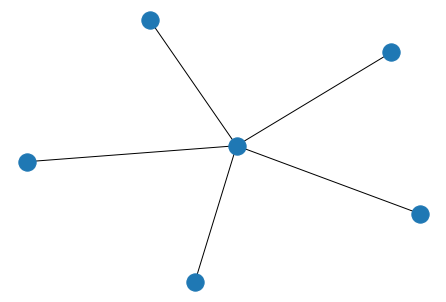

In [15]:
nx.draw(H)